# Case Study 2 : Data Science in Yelp Data

**Required Readings:** 
* [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge) 
* Please download the Yelp dataset from the above webpage.
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

Here is an example of the data format. More details are included [here](https://www.yelp.com/dataset_challenge)

## Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
## Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Our goal is to provide insight into the ratings of various restaurants from different types of cuisines, across multiple cities in the Yelp data. We want to provide tourists with an understanding of the types of food that can be found in given cities, and the overall perception/rating of the food in the city, categorized by the type of cuisine. Tourists can travel to cities that serve a higher standard of food in cuisines that they are interested in, and cities/restaurants can advertise their higher rated food to those that are interested, if they know the foods that their city provides the best.

For entreprenuers, the information about highly rated food across cities and cuisines gives insight into the other competition that exists for food. New entrepreneurs can focus on cuisines that do not have a highly rated presence in a city in order to quickly gain control of the market. Instead of competing with 400 highly rated restaurants of one type of food, they can focus on a cuisine/food type not in the city at all.

# Data Collection/Processing: 

In [1]:
import json

# Read the Yelp checkin file
list_checkin = []
with open("yelp_dataset_challenge_round9~/yelp_academic_dataset_checkin.json") as checkin_file:
    for line in checkin_file:
        list_checkin.append(json.loads(line))

# Print the number of checkin objects
print 'Check-in objects: {}\n'.format(len(list_checkin))

# Print the first checkin object
print json.dumps(list_checkin[0], indent=1)

# Read the Yelp business file
list_business = []
dict_business = []

counter = 0
with open("yelp_dataset_challenge_round9~/yelp_academic_dataset_business.json") as business_file:
    for line in business_file:
        list_business.append(json.loads(line))
        dict_business.append(list_business[counter]["business_id"])
        counter += 1

# Print the number of business objects
print '\nBusiness objects: {}\n'.format(len(list_business))

# Print the first business object
print json.dumps(list_business[0], indent=1)

Check-in objects: 125532

{
 "type": "checkin", 
 "business_id": "7KPBkxAOEtb3QeIL9PEErg", 
 "time": [
  "Fri-0:2", 
  "Sat-0:1", 
  "Sun-0:1", 
  "Wed-0:2", 
  "Sat-1:2", 
  "Thu-1:1", 
  "Wed-1:1", 
  "Sat-2:1", 
  "Sun-2:2", 
  "Thu-2:1", 
  "Wed-2:1", 
  "Fri-3:1", 
  "Sun-3:3", 
  "Thu-4:1", 
  "Tue-4:1", 
  "Sun-6:1", 
  "Wed-6:1", 
  "Fri-10:1", 
  "Sat-10:1", 
  "Mon-11:1", 
  "Wed-11:2", 
  "Mon-12:1", 
  "Sat-12:1", 
  "Tue-12:1", 
  "Sat-13:2", 
  "Thu-13:1", 
  "Tue-13:2", 
  "Wed-13:2", 
  "Fri-14:2", 
  "Sat-14:1", 
  "Wed-14:1", 
  "Fri-15:1", 
  "Sat-15:1", 
  "Thu-15:1", 
  "Tue-15:1", 
  "Fri-16:1", 
  "Sat-16:2", 
  "Sun-16:1", 
  "Tue-16:1", 
  "Sat-17:3", 
  "Sun-17:1", 
  "Fri-18:1", 
  "Mon-18:1", 
  "Sat-18:2", 
  "Sun-18:1", 
  "Tue-18:2", 
  "Wed-18:1", 
  "Fri-19:2", 
  "Mon-19:1", 
  "Sun-19:2", 
  "Thu-19:1", 
  "Wed-19:1", 
  "Mon-20:1", 
  "Sun-20:5", 
  "Thu-20:1", 
  "Tue-20:1", 
  "Wed-20:2", 
  "Fri-21:2", 
  "Sun-21:1", 
  "Thu-21:4", 
  "Tue-21:1", 

# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [2]:
# Dictionary of categories
business_categories = {}

# Iterates over all the businesses
for x in list_business:
    if x['categories'] != None:
        # Iterates over all present categories
        for y in x['categories']:
            # Gets the current category
            tempCat = y 
    
            # Check if already exists
            if (business_categories.has_key(tempCat)):
                business_categories[tempCat] += 1
            else:
                tempDict = {tempCat: 1}
                business_categories.update(tempDict)

tempCounter = 0

# Print top 10 business categories
for item in sorted(business_categories, key=business_categories.get, reverse=True):
    if (tempCounter < 10):
        print item, business_categories[item]
        tempCounter += 1
    else:
        break

Restaurants 48485
Shopping 22466
Food 21189
Beauty & Spas 13711
Home Services 11241
Nightlife 10524
Health & Medical 10476
Bars 9087
Automotive 8554
Local Services 8133


** (2) Find the most popular business objects** 
* print the top 10 most popular business objects in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [3]:
# Dictionary of categories
checkin_counter = {}

# Iterates over all the businesses
for x in list_checkin: 
    tempBusinessID = x['business_id']
    
    tempBusinessCount = 0
    
    # Get each time of day and number of check ins
    for time in x['time']:
        count = int(time.split(':')[1])
        tempBusinessCount += count

    checkin_counter.update({tempBusinessID: tempBusinessCount})
    
tempCounter = 0

# Print top 10 business IDs based on check in counts
for item in sorted(checkin_counter, key=checkin_counter.get, reverse=True):
    if (tempCounter < 10):
        print item, checkin_counter[item]
        tempCounter += 1
    else:
        break

FaHADZARwnY4yvlvpnsfGA 119204
JmI9nslLD7KZqRr__Bg6NQ 101181
yQab5dxZzgBLTEHCw9V7_w 44874
5LNZ67Yw9RD6nf4_UhXOjw 41303
SMPbvZLSMMb7KU76YNYMGg 30725
Wxxvi3LZbHNIDwJ-ZimtnA 28511
na4Th5DrNauOv-c43QQFvA 27213
El4FC8jcawUVgw_0EIcbaQ 26506
VyjyHoBg3KC5BSFRlD0ZPQ 25267
IZivKqtHyz4-ts8KsnvMrA 24826


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

We are first trying to separate the data by each restaurant, and get the different categories of cuisine that each restaurant fits in. From this, we can then aggregate the data in various forms to show average ratings for restaurants in a specific type of cuisine, the number of restaurants in a city for each type of cuisine, and which cities are in our data.

Write codes to implement the solution in python:

In [4]:
# Object to store restaurant attributes
class Restaurant(object):    
    def __init__(self, categories,city,stars,review_count,latitude,longitude): 
        self.categories = categories
        self.city = city
        self.stars = stars
        self.review_count = review_count
        self.latitude = latitude
        self.longitude = longitude


# Dictionary of restaurant categories
rest_categories = {}

# List of restaurants
rest_list = []

# Iterates over all the businesses
for x in list_business:
    # Initialize default values
    categories = []
    city = " "
    stars = " "
    review_count = " "
    latitude = " "
    longitude = " "
    
    if x['categories'] != None:
        if "Restaurants" in x['categories']: # We only want restaurants
            categories = x['categories']
            for y in x['categories']: # Iterates over all present categories
                tempCat = y # Gets the current category
                if (rest_categories.has_key(tempCat)):
                    rest_categories[tempCat] += 1
                else:
                    tempDict = {tempCat: 1}
                    rest_categories.update(tempDict)
            # Fill in all other necessary data
            if x['city'] != None:
                city = x['city']
            if x['stars'] != None:
                stars = x['stars']
            if x['review_count'] != None:
                review_count = x['review_count']
            if x['latitude'] != None:
                latitude = x['latitude']
            if x['longitude'] != None:
                longitude = x['longitude']   
                
            rest_list.append(Restaurant(categories,city,stars,review_count,latitude,longitude))

tc = 0

# Print first 10 restaurants
for cuisine in rest_list:
    if(tc < 10):
        print cuisine.categories, cuisine.city, cuisine.stars, cuisine.review_count, cuisine.latitude, cuisine.longitude
        tc += 1
    else:
        break

[u'Restaurants', u'Pizza', u'Chicken Wings', u'Italian'] Toronto 2.5 7 43.661054 -79.429089
[u'Tex-Mex', u'Mexican', u'Fast Food', u'Restaurants'] Scottsdale 2.5 9 33.58671 -111.83541
[u'Hawaiian', u'Restaurants', u'Barbeque'] Henderson 4.0 38 36.029596485 -115.085821152
[u'Restaurants', u'Cafes'] Boucherville 3.5 7 45.590227 -73.430235
[u'Sandwiches', u'Breakfast & Brunch', u'Salad', u'Restaurants'] Montréal 4.0 3 45.5023462 -73.5738073
[u'Fast Food', u'Mexican', u'Restaurants'] Toronto 3.5 68 43.6449201 -79.3833328
[u'Restaurants', u'Italian', u'Seafood'] Glendale 3.5 119 33.6393005153 -112.180893379
[u'Restaurants', u'Mexican', u'American (Traditional)'] Amherst 3.5 22 41.4161517 -82.2076029
[u'Restaurants', u'Waffles', u'Southern', u'Soul Food'] Phoenix 4.0 1276 33.4353717916 -112.073970304
[u'Persian/Iranian', u'Restaurants', u'Ethnic Food', u'Food', u'Greek', u'Specialty Food'] Las Vegas 2.5 15 36.1010205 -115.2443122


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


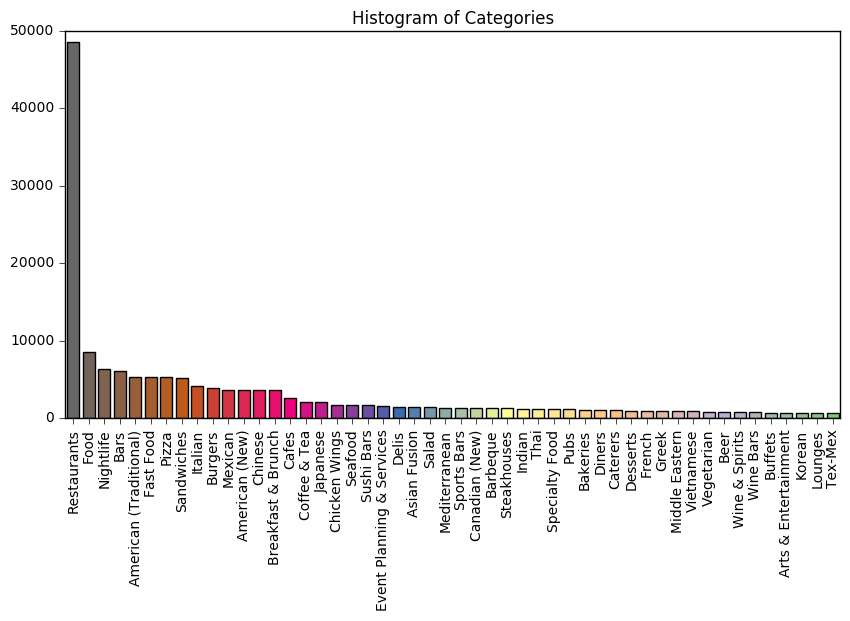

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Ordered list of categories by count
sorted_rest_categories = sorted(rest_categories, key=rest_categories.get, reverse=True)

# Set figure size for clarity
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_rest_categories[0:50]]
category_counts = [rest_categories[category] for category in sorted_rest_categories[0:50]]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Histogram of Categories')

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

In [6]:
cities = dict()

# Get each unique city and its latitude and longitude
for cuisine in rest_list:
    if cities.has_key(cuisine.city) == False:
        cities[cuisine.city] = {
            'lat': cuisine.latitude,
            'lon': cuisine.longitude
        }

lons = []
lats = []

# Convert to parallel arrays for use in Basemap
for city in cities.keys():
    lons.append(cities[city]['lon'])
    lats.append(cities[city]['lat'])

print 'Unique cities: {}'.format(len(cities.keys()))

Unique cities: 674


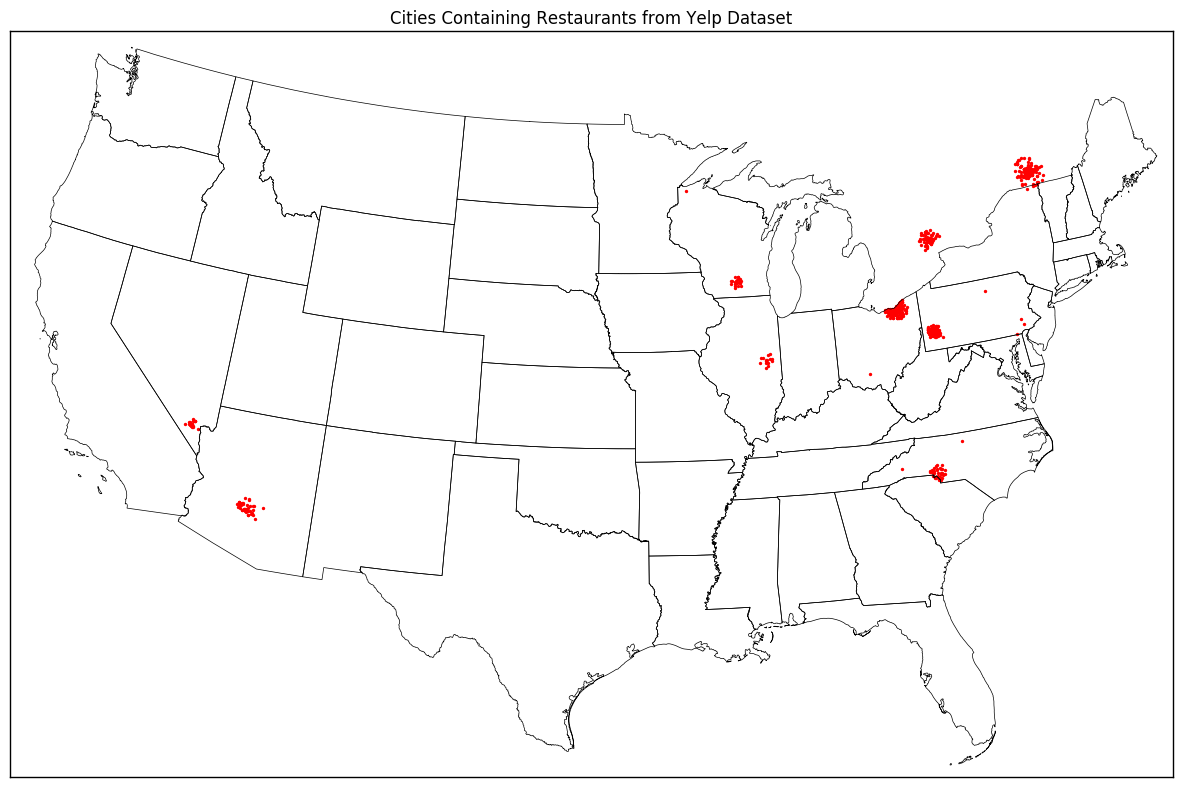

In [7]:
# For the map, we use the Basemap package, which can be found 
# here: https://sourceforge.net/projects/matplotlib/files/matplotlib-toolkits/basemap-1.0.7/

# We also require the shape files for the United States, which can be found
# here: https://github.com/matplotlib/basemap/tree/master/examples

# We base the map implementation from an example, which can be found
# here: http://stackoverflow.com/questions/7586384/color-states-with-pythons-matplotlib-basemap

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
import sys

# Set figure size for clarity
plt.figure(figsize=(15, 10))

# Build map
map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# load shapefile
map.readshapefile('map_data/st99_d00', name='states', drawbounds=True)

# Convert latitudes and longitudes of cities into map coordinates
x, y = map(lons, lats)
map.scatter(x, y, 2, marker='o', color='red')
    
# Axes instance
ax = plt.gca()
plt.title('Cities Containing Restaurants from Yelp Dataset')
plt.show()

In [8]:
# City selector
city_name = 'Las Vegas'
city_cuisines = []

def get_cuisines_by_city(city, restaurant_list):
    """
    Returns the cuisine entries for the specified city.
    
    Arguments:
        city: The name of the city.
        restaurant_list: The list of unique restaurants in the Yelp data.
    Returns:
        a list of restaurants in the city
    """
    city_list = []
    
    # Get restaurants by city
    for cuisine in restaurant_list:
        if cuisine.city == city:
            city_list.append(cuisine)
    
    return city_list

city_cuisines = get_cuisines_by_city(city_name, rest_list)

# Categories to filter out because they are irrelevant or too general
filter_list = ['Restaurants', 'Food', 'Specialty Food', 'Shopping', 'Professional Services', 'Investing',
               'Imported Food', 'Education', 'IT Services & Computer Repair', 'Bankruptcy Law', 'Hair Salons',
               'Lawyers', 'Jewelry', 'Specialty Schools', 'Event Planning & Services', 'Hotels', 'Internet Cafes',
               'Hotels & Travel', 'Venues & Event Spaces']

# Categories to subclass to types of cuisines
filtered_bars = ['Bars','Pubs','Sports Bars','Wine Bars']
filtered_ethnic = ['American (Traditional)','Italian','Mexican','American (New)','Chinese','Japanese','Mediterranean',
                  'Canadian (New)','Indian','Thai','Greek','Middle Eastern', 'Vietnamese', 'Korean', 'Tex-Mex','German',
                  'Caribbean', 'Latin American','Pakistani','British']
filtered_breakfast = ['Breakfast & Brunch','Diners']
filtered_non_meat = ['Vegetarian','Vegan']
filtered_dessert = ['Bakeries','Desserts','Ice Cream & Frozen Yogurt']
filtered_buffets = ['Buffets']

filtered_list = []
filtered_list.extend(filtered_bars)
filtered_list.extend(filtered_ethnic)
filtered_list.extend(filtered_breakfast)
filtered_list.extend(filtered_non_meat)
filtered_list.extend(filtered_dessert)
filtered_list.extend(filtered_buffets)

def get_avg_stars_for_cuisines(cuisines_list, keep_filter_list):
    # Sort cuisines in city by star count
    sorted_cuisines = sorted(cuisines_list, key=lambda x: x.stars, reverse=True)
    
    # Store cuisine category -> average stars
    city_cuisines_dict = dict()

    # Get each cuisine in city
    for cuisine in sorted_cuisines:
        cuisine.categories = [c for c in cuisine.categories if c in keep_filter_list]

        # Get stars for each category
        for category in cuisine.categories:
            if city_cuisines_dict.has_key(category):
                city_cuisines_dict[category].append(cuisine.stars)
            else:
                city_cuisines_dict[category] = []
                city_cuisines_dict[category].append(cuisine.stars)

    # Calculate average of all star values per category
    for category in city_cuisines_dict.keys():
        star_sum = np.sum(city_cuisines_dict[category]) / len(city_cuisines_dict[category]) * 1.0
        city_cuisines_dict[category] = star_sum
    
    return city_cuisines_dict

city_cuisines_dict = get_avg_stars_for_cuisines(city_cuisines, filtered_list)

# Sort categories by stars
sorted_city_cuisines_dict = sorted(city_cuisines_dict, key=city_cuisines_dict.get, reverse=True)

print sorted_city_cuisines_dict[0:50]

[u'Vegan', u'German', u'Vegetarian', u'Wine Bars', u'Caribbean', u'Latin American', u'Desserts', u'Middle Eastern', u'Thai', u'Mediterranean', u'Korean', u'Indian', u'Japanese', u'British', u'Bakeries', u'Greek', u'American (New)', u'Ice Cream & Frozen Yogurt', u'Breakfast & Brunch', u'Bars', u'Vietnamese', u'Italian', u'Pakistani', u'Pubs', u'Mexican', u'Sports Bars', u'American (Traditional)', u'Diners', u'Chinese', u'Tex-Mex', u'Buffets']


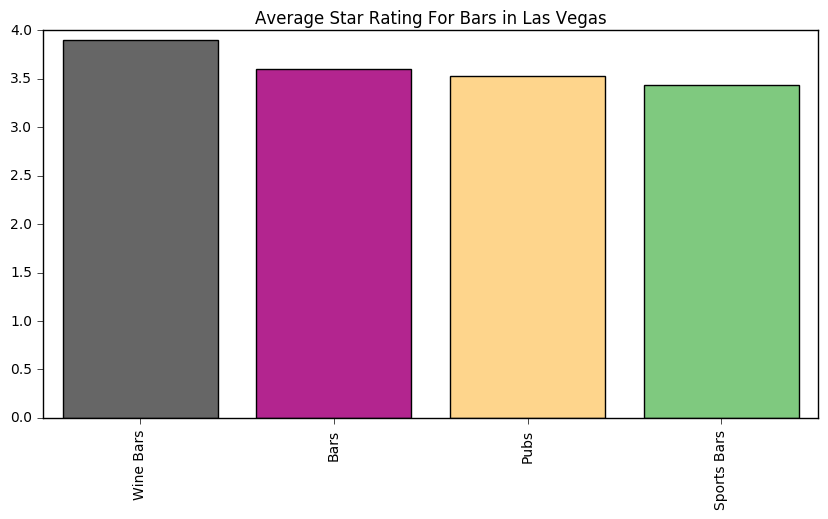

In [9]:
# Bars
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] if category in filtered_bars]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50] if category in filtered_bars]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating For Bars in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

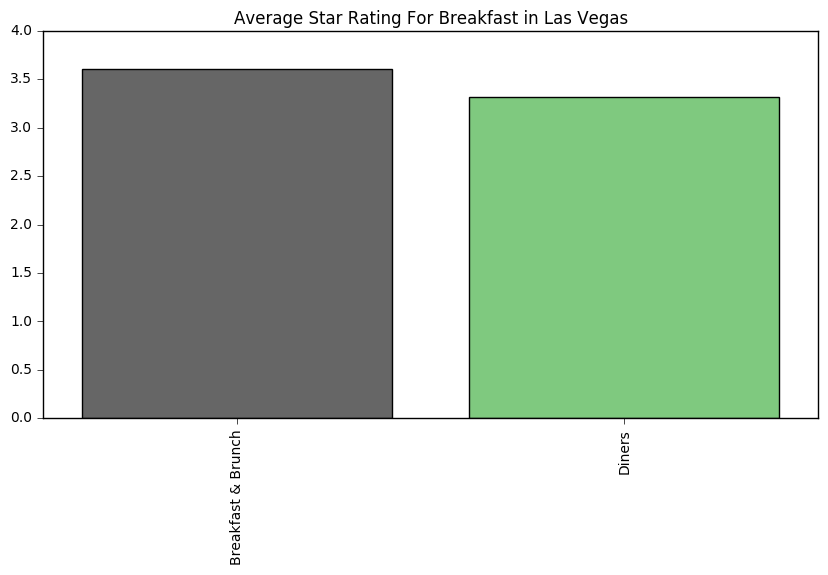

In [10]:
# Breakfast
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] if category in filtered_breakfast]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50] if category in filtered_breakfast]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating For Breakfast in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

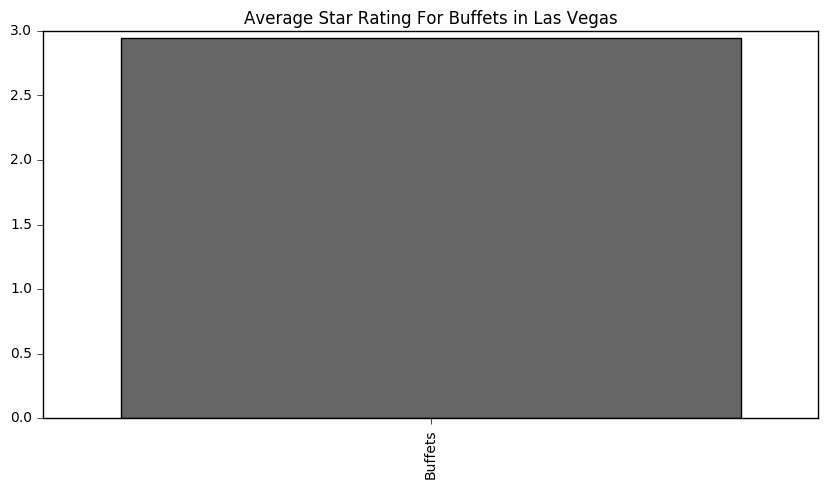

In [11]:
# Buffets
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] if category in filtered_buffets]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50] if category in filtered_buffets]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating For Buffets in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

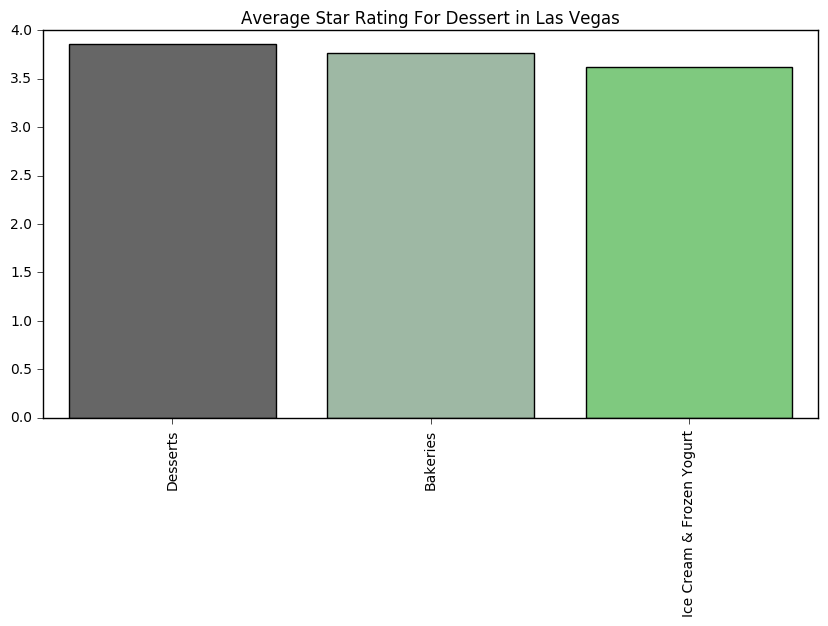

In [12]:
# Dessert
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] if category in filtered_dessert]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50] if category in filtered_dessert]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating For Dessert in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

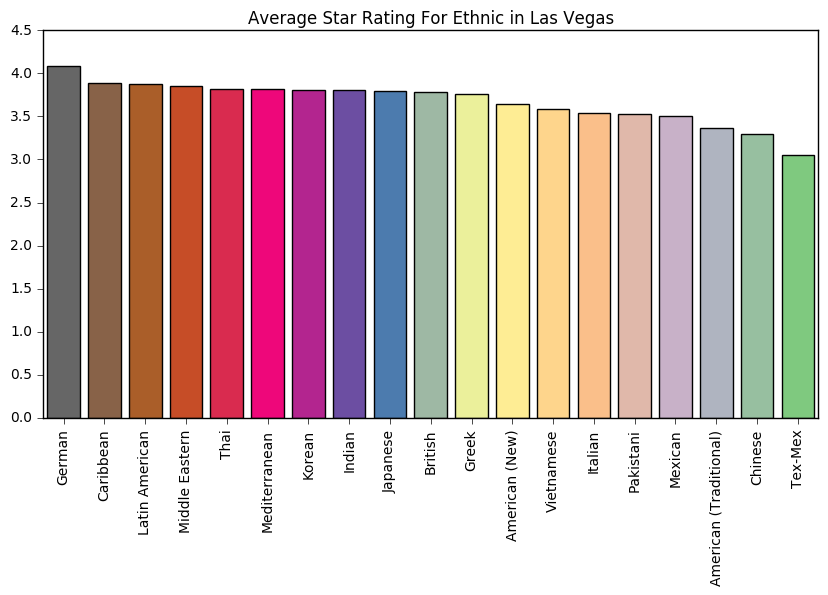

In [13]:
# Ethnic
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] if category in filtered_ethnic]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50] if category in filtered_ethnic]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating For Ethnic in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

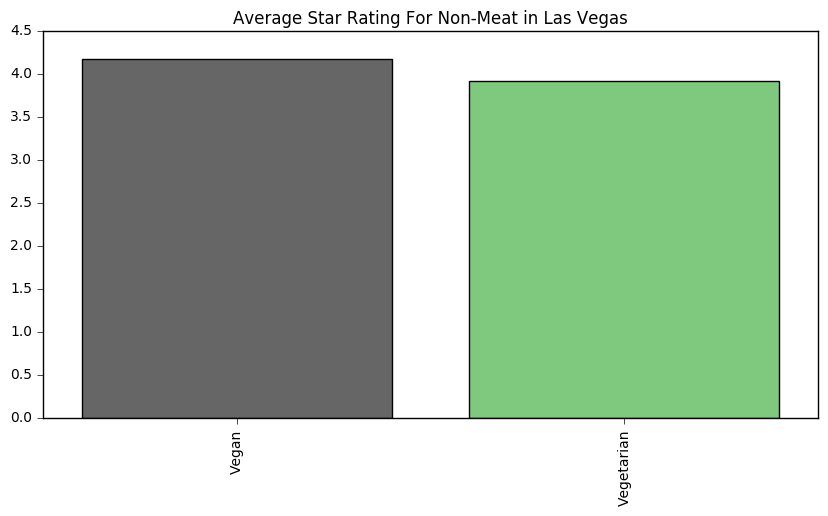

In [14]:
# Non-Meat
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] if category in filtered_non_meat]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50] if category in filtered_non_meat]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating For Non-Meat in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

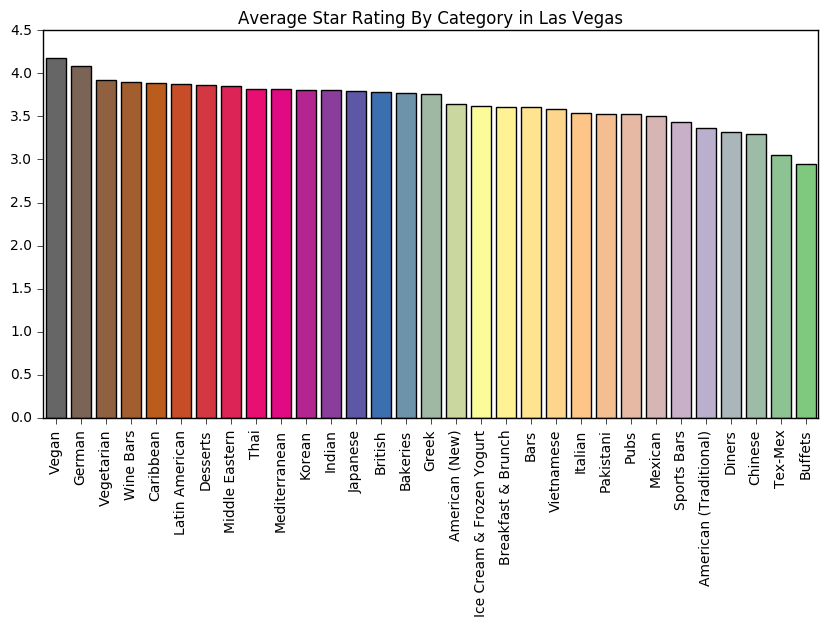

In [15]:
# Set figure size for clarity
plt.figure(figsize=(10, 5))

# Graph bar graph of restaurant categories
categories = [category for category in sorted_city_cuisines_dict[0:50] ]
category_counts = [city_cuisines_dict[category] for category in sorted_city_cuisines_dict[0:50]]

# Get colors
cmap = plt.get_cmap('Accent_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
categories_len = range(len(categories))

# Plot bars
plt.bar(categories_len, category_counts, align='center', color=colors)
plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
locs, labels = plt.xticks(categories_len, categories)
plt.setp(labels, rotation=90)
plt.title('Average Star Rating By Category in {}'.format(city_name))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')

ax = plt.gca()
ax.tick_params(direction='out')

plt.show()

In [16]:
def get_counts_for_cuisines(cuisines_list, remove_filter_list):
    # Sort cuisines in city by count
    city_cuisines_counts = dict()

    # Get each cuisine in city
    for cuisine in cuisines_list:
        cuisine.categories = [c for c in cuisine.categories if c not in remove_filter_list]

        # Get counts for each category
        for category in cuisine.categories:
            if city_cuisines_counts.has_key(category):
                city_cuisines_counts[category] += 1
            else:
                city_cuisines_counts[category] = 1

    return city_cuisines_counts

print 'Defined cuisine count function.'

Defined cuisine count function.


In [17]:
first_city = 'Montreal'
second_city = 'Las Vegas'

first_cuisines = get_cuisines_by_city(first_city, rest_list)
first_city_cuisines = get_avg_stars_for_cuisines(first_cuisines, filtered_list)
first_city_cuisine_counts = get_counts_for_cuisines(first_cuisines, filter_list)

sorted_first_dict = sorted(first_city_cuisines, key=first_city_cuisines.get, reverse=True)
sorted_first_city_cuisines_counts = sorted(first_city_cuisine_counts, key=first_city_cuisine_counts.get, reverse=True)

second_cuisines = get_cuisines_by_city(second_city, rest_list)
second_city_cuisines = get_avg_stars_for_cuisines(second_cuisines, filtered_list)
second_city_cuisine_counts = get_counts_for_cuisines(second_cuisines, filter_list)

sorted_second_dict = sorted(second_city_cuisines, key=second_city_cuisines.get, reverse=True)
sorted_second_city_cuisines_counts = sorted(second_city_cuisine_counts, key=second_city_cuisine_counts.get, reverse=True)

common_cuisines = []

# Find common cuisines to compare ratings
for cuisine in first_city_cuisines:
    if cuisine in second_city_cuisines:
        common_cuisines.append(cuisine)

print common_cuisines

[u'Vietnamese', u'Breakfast & Brunch', u'Indian', u'Latin American', u'Korean', u'Pakistani', u'American (New)', u'Vegan', u'Pubs', u'Diners', u'Sports Bars', u'Thai', u'Bakeries', u'Vegetarian', u'Greek', u'Italian', u'Ice Cream & Frozen Yogurt', u'Bars', u'Mexican', u'Chinese', u'American (Traditional)', u'Mediterranean', u'Japanese', u'Desserts', u'Wine Bars']


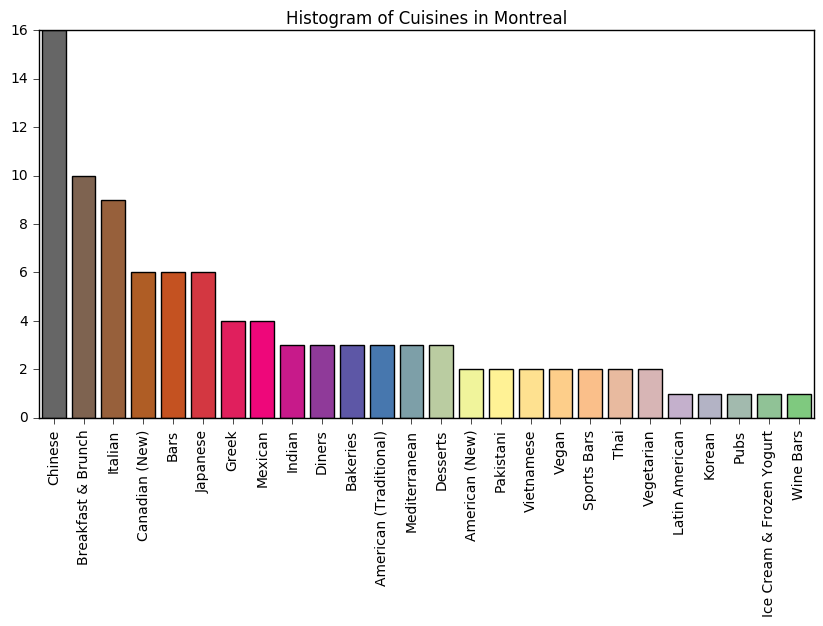

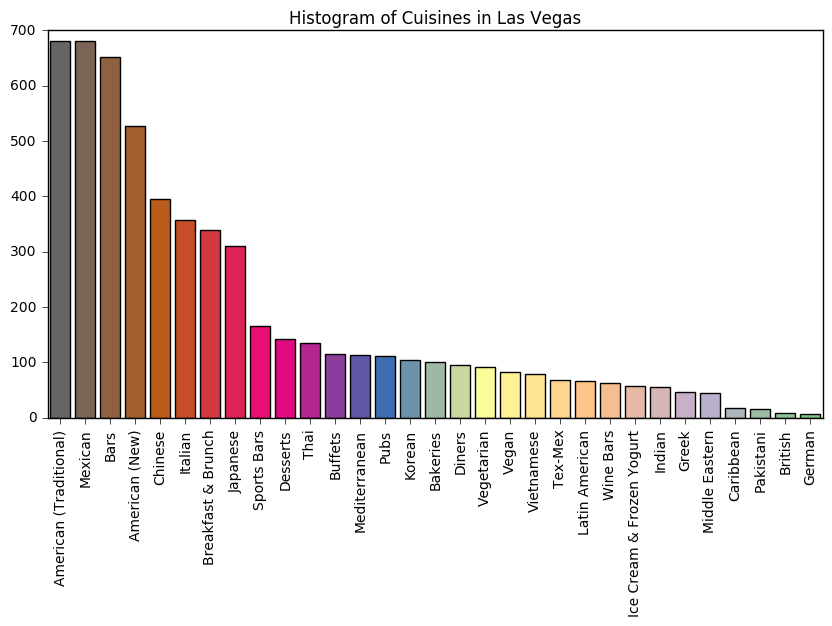

In [18]:
def generate_cuisine_count_histogram(city_name, sorted_city_cuisines_counts, city_cuisines_counts):
    # Set figure size for clarity
    plt.figure(figsize=(10, 5))

    # Graph bar graph of restaurant categories
    categories = [category for category in sorted_city_cuisines_counts[0:50]]
    category_counts = [city_cuisines_counts[category] for category in sorted_city_cuisines_counts[0:50]]

    # Get colors
    cmap = plt.get_cmap('Accent_r')
    colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
    categories_len = range(len(categories))

    # Plot bars
    plt.bar(categories_len, category_counts, align='center', color=colors)
    plt.xlim([min(categories_len) - 0.5, max(categories_len) + 0.5])
    locs, labels = plt.xticks(categories_len, categories)
    plt.setp(labels, rotation=90)
    plt.title('Histogram of Cuisines in {}'.format(city_name))

    # Handle tick marks
    plt.tick_params(axis='x', which='both', top='off')
    plt.tick_params(axis='y', which='both', right='off')

    ax = plt.gca()
    ax.tick_params(direction='out')

    plt.show()

generate_cuisine_count_histogram(first_city, sorted_first_city_cuisines_counts, first_city_cuisine_counts)
generate_cuisine_count_histogram(second_city, sorted_second_city_cuisines_counts, second_city_cuisine_counts)

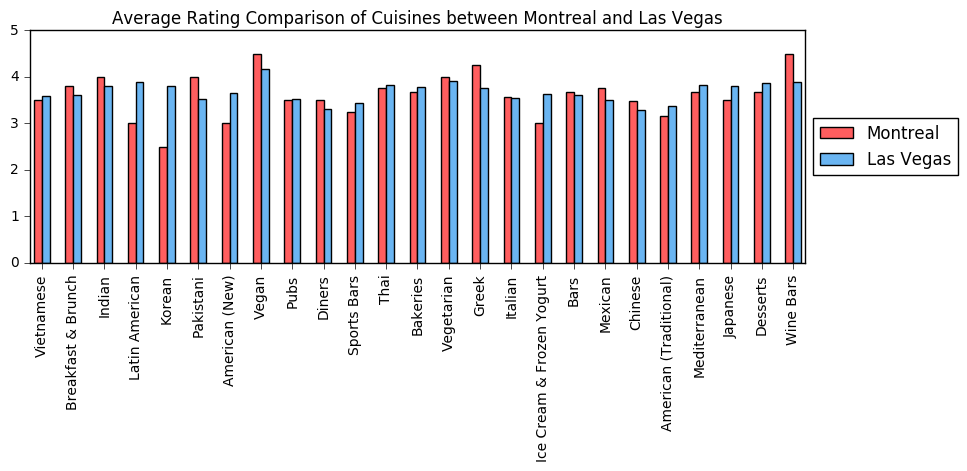

In [36]:
# Graph grouped bar graph of restaurant categories
categories = [cuisine for cuisine in common_cuisines]
first_category_stars = [first_city_cuisines[cuisine] for cuisine in common_cuisines]
second_category_stars = [second_city_cuisines[cuisine] for cuisine in common_cuisines]

categories_len = np.arange(len(categories))
bar_width = 0.25

# Set figure size for clarity
fig, ax = plt.subplots(figsize=(10, 3))

# Plot bars
rects1 = plt.bar(categories_len, first_category_stars, color='#ff5e5f', align='center',
                 width=bar_width, label=first_city)
rects2 = plt.bar(categories_len + bar_width, second_category_stars, color='#6ab5f2', align='center',
                 width=bar_width, label=second_city)

plt.xlim([min(categories_len) - bar_width, max(categories_len) + bar_width * 2])
plt.ylim([0.0, 5.0])

locs, labels = plt.xticks(categories_len + bar_width / 2, categories)
plt.setp(labels, rotation=90)
plt.title('Average Rating Comparison of Cuisines between {} and {}'.format(first_city, second_city))

# Handle tick marks
plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', right='off')
ax.tick_params(direction='out')

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 2".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) Finding the most popular business categories (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular business objects (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


